## Gaussian Naive Bayes

Run the code given below to create 400 simulated 2-dimensional observations ```X``` and corresponding true labels 
```y_true```. True labels range from 0 to 3. Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. 

### Create Training Data (X, y_true) 

1. Choose a class of model (Naive Bayes)
2. Choose model hyperparameters (Gaussian with number of groups(2))
3. Wrestle data into shape (X[400,2], y[400,1])

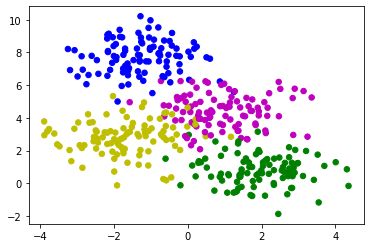

In [14]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4,                                             # 4 clusters (centers)
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0)   # 2 features

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_true[i]] for i in range(len(y_true))], s=30); 

### Predict the label color by Hand

- Estimate the means and covariance matrices
- Find the conditional densities $P(x1,x2|Li)$ at $(0,4)$
- In this case, $P(Li)$ are the same (0.25), only compare the conditional densities.

In [15]:
# Find sample mean vectors and sample covariance matrices of the four separate groups

import numpy as np
from scipy.stats import multivariate_normal

means = []
cov = []

for i in range(4):
    idx = (y_true==i)
    means.append(np.mean(X[idx,:],axis = 0))
    cov.append(np.cov(X[idx,:].T))

In [16]:
# Then compute the multivariate Normal density at the given point x=(0,4) for each of the four distributions

densities = []

for i in range(4):
    rv = multivariate_normal(means[i], cov[i])
    densities.append(rv.pdf((0,4)))
    
colors[np.array(densities).argmax()]


'm'

We first need to estimate the mean vector and covariance matrix of each of the four groups of points from the data. Then, we use those estimates to compute the values of the four multivariate Normal densities at the given point (0,4). The estimates $P(L_i)$ are all the same (equal to 0.25) since we have equally many points in the four groups. 
Hence, the most likely group is the one where the density is the highest. In this case that is the case for group with index 0 (and color 'Magenta' - the pinkish points in the scatterplot above). 

### Predict the label color by Scikit-Learn
- Fit the model to the training data
```
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y_true)
```
- Use the model to predict labels for new data (labels: 0,1,2,3)
``` 
y_predict = model.predict(X)
```
- Plot Predicted y-label (4种颜色)
```
fig, ax = plt.subplots()
colors = ('m', 'g', 'y', 'b')
ax.scatter(X[:, 0], X[:, 1], c = [colors[y_predict[i]] for i in range(len(y_predict))], s=30);
```

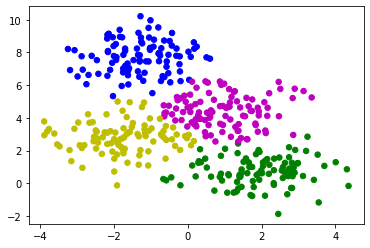

In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y_true)
y_predict = model.predict(X)

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_predict[i]] for i in range(len(y_predict))], s=30); 

### Create a confusion matrix 
Compares your predicted labels (from (b)) to the true labels ```y_true```

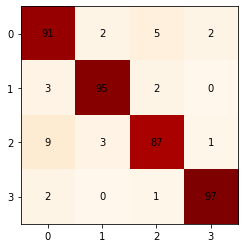

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(y_true, y_predict, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks 
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

# Loop over data dimensions and create text annotations:
for i in range(4): 
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(91+95+87+97)/400 = 92.5\% of points are classified correctly by the Gaussian Naive Bayes method. 